---
---
# 🦋 **도움배움AI**: team EarlyUS

> 도움배움AI는 장애학생의 정보와 과거 데이터를 바탕으로 매칭 확률을 예측하고, 데이터분석을 통해 인사이트를 제공합니다.
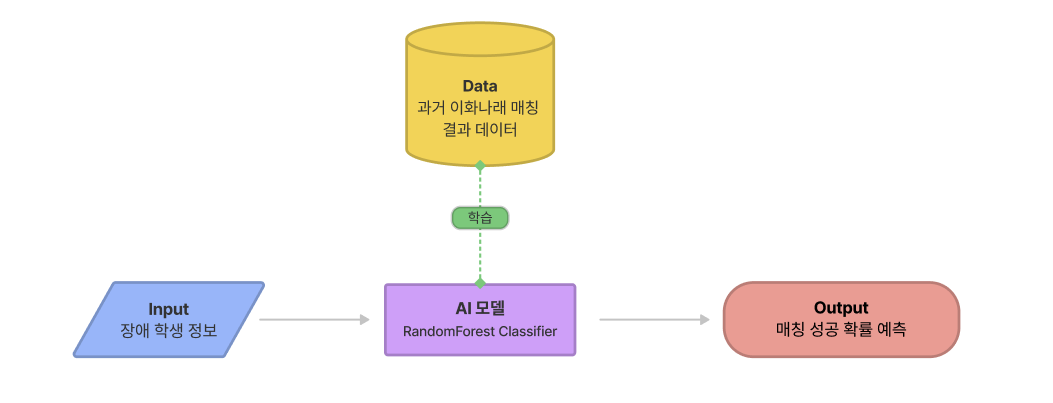

---



# **도움배움AI: 사용법**



> ⚠️ 주석(#)으로 안내된 부분을 제외한 코드는 바꾸지 말아주세요.
⚠️모델 실행 중간에 나타나는 팝업은 모두 허용해 주세요.

1. https://drive.google.com/drive/u/0/folders/1uoVtNu9mdSyAeRWBn0HPDZo1iwuEOoPU 에서 pkl 파일 2개와, excel 1개, csv 1개 데이터를 다운받아 Google Drive에 업로드 해주세요.
- Ewhathon_final.csv: 과거 이화나래 결과 매칭 데이터. 지속적인 업데이트 가능
- Ewhathon_test_sample.xlsx: 이화나래를 신청한 확률 예측 대상 장애학생의 데이터.
2. 화면 왼쪽 상단의 [런타임] > [모두 실행] 클릭
3. 실행이 완료되면, AI 확률 예측이 포함된 **엑셀 파일이 자동 다운로드 됩니다**(모델 실행까지 최대 5~10분이 소요될 수 있습니다.)

---
---

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
import pandas as pd
import numpy as np

# file_path: 과거 이화나래 결과 매칭 데이터

###

#오류 발생시 이 곳의 file_path 직접 재설정
file_path = '/content/drive/MyDrive/Ewhathon_final.csv'

####

df = pd.read_csv(file_path)


> ### ⛔ 아래 코드부터 변형 금지




In [ ]:
df

In [113]:
df = df.rename(columns={'장애유형': 'disType'})
df = df.rename(columns={'학수번호': 'haksuNum'})
df = df.rename(columns={'분반': 'classNum'})
df = df.rename(columns={'교과목명': 'className'})
df = df.rename(columns={'개설학과/전공': 'classDept'})
df = df.rename(columns={'교과영역': 'subjectArea'})
df = df.rename(columns={'교과목 구분': 'subjectArea2'})
df = df.rename(columns={'교수명': 'profName'})
df = df.rename(columns={'정원': 'studentNum'})
df = df.rename(columns={'시간': 'classTime'})
df = df.rename(columns={'학점': 'Credit'})
df = df.rename(columns={'요일/교시': 'classDate'})
df = df.rename(columns={'교실': 'classLocation'})
df = df.rename(columns={'지원종류': 'helpType'})
df = df.rename(columns={'원격강의': 'classOnline'})
df = df.rename(columns={'이동지원': 'helpMove'})
df = df.rename(columns={'교생실습지원': 'helpTeach'})
df = df.rename(columns={'수업참여지원': 'helpParticipate'})
df = df.rename(columns={'알림사항지원': 'helpAlert'})
df = df.rename(columns={'결과': 'result'})

In [114]:
#df

In [115]:
from sklearn.preprocessing import OrdinalEncoder

def ordinal_encoder():
   return OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

ordinal_encoder_disType = ordinal_encoder()
ordinal_encoder_haksuNum = ordinal_encoder()
ordinal_encoder_className = ordinal_encoder()
ordinal_encoder_classDept = ordinal_encoder()
ordinal_encoder_subjectArea = ordinal_encoder()
ordinal_encoder_subjectArea2 = ordinal_encoder()
ordinal_encoder_profName = ordinal_encoder()
ordinal_encoder_studentNum = ordinal_encoder()
ordinal_encoder_classTime = ordinal_encoder()
ordinal_encoder_Credit = ordinal_encoder()
ordinal_encoder_classDate = ordinal_encoder()
ordinal_encoder_classLocation = ordinal_encoder()
ordinal_encoder_helpType = ordinal_encoder()

df['disType'] = ordinal_encoder_disType.fit_transform(df[['disType']])
df['haksuNum'] = ordinal_encoder_haksuNum.fit_transform(df[['haksuNum']])
df['className'] = ordinal_encoder_className.fit_transform(df[['className']])
df['classDept'] = ordinal_encoder_classDept.fit_transform(df[['classDept']])
df['subjectArea'] = ordinal_encoder_subjectArea.fit_transform(df[['subjectArea']])
df['subjectArea2'] = ordinal_encoder_subjectArea2.fit_transform(df[['subjectArea2']])
df['profName'] = ordinal_encoder_profName.fit_transform(df[['profName']])
df['studentNum'] = ordinal_encoder_studentNum.fit_transform(df[['studentNum']])
df['classTime'] = ordinal_encoder_classTime.fit_transform(df[['classTime']])
df['Credit'] = ordinal_encoder_Credit.fit_transform(df[['Credit']])
df['classDate'] = ordinal_encoder_classDate.fit_transform(df[['classDate']])
df['classLocation'] = ordinal_encoder_classLocation.fit_transform(df[['classLocation']])
df['helpType'] = ordinal_encoder_helpType.fit_transform(df[['helpType']])

In [116]:
mapping_disType = dict(zip(ordinal_encoder_disType.categories_[0], ordinal_encoder_disType.fit_transform(ordinal_encoder_disType.categories_[0].reshape(-1, 1)).flatten().tolist()))
mapping_haksuNum = dict(zip(ordinal_encoder_haksuNum.categories_[0], ordinal_encoder_haksuNum.fit_transform(ordinal_encoder_disType.categories_[0].reshape(-1, 1)).flatten().tolist()))
mapping_className = dict(zip(ordinal_encoder_className.categories_[0], ordinal_encoder_className.fit_transform(ordinal_encoder_className.categories_[0].reshape(-1, 1)).flatten().tolist()))
mapping_classDept = dict(zip(ordinal_encoder_classDept.categories_[0], ordinal_encoder_classDept.fit_transform(ordinal_encoder_classDept.categories_[0].reshape(-1, 1)).flatten().tolist()))
mapping_subjectArea = dict(zip(ordinal_encoder_subjectArea.categories_[0], ordinal_encoder_subjectArea.fit_transform(ordinal_encoder_subjectArea.categories_[0].reshape(-1, 1)).flatten().tolist()))
mapping_subjectArea2 = dict(zip(ordinal_encoder_subjectArea2.categories_[0], ordinal_encoder_subjectArea2.fit_transform(ordinal_encoder_subjectArea2.categories_[0].reshape(-1, 1)).flatten().tolist()))
mapping_profName = dict(zip(ordinal_encoder_profName.categories_[0], ordinal_encoder_profName.fit_transform(ordinal_encoder_profName.categories_[0].reshape(-1, 1)).flatten().tolist()))
mapping_studentNum = dict(zip(ordinal_encoder_studentNum.categories_[0], ordinal_encoder_studentNum.fit_transform(ordinal_encoder_studentNum.categories_[0].reshape(-1, 1)).flatten().tolist()))
mapping_classTime = dict(zip(ordinal_encoder_classTime.categories_[0], ordinal_encoder_classTime.fit_transform(ordinal_encoder_classTime.categories_[0].reshape(-1, 1)).flatten().tolist()))
mapping_Credit = dict(zip(ordinal_encoder_Credit.categories_[0], ordinal_encoder_Credit.fit_transform(ordinal_encoder_Credit.categories_[0].reshape(-1, 1)).flatten().tolist()))
mapping_classDate = dict(zip(ordinal_encoder_classDate.categories_[0], ordinal_encoder_classDate.fit_transform(ordinal_encoder_classDate.categories_[0].reshape(-1, 1)).flatten().tolist()))
mapping_classLocation = dict(zip(ordinal_encoder_classLocation.categories_[0], ordinal_encoder_classLocation.fit_transform(ordinal_encoder_classLocation.categories_[0].reshape(-1, 1)).flatten().tolist()))
mapping_helpType = dict(zip(ordinal_encoder_helpType.categories_[0], ordinal_encoder_helpType.fit_transform(ordinal_encoder_helpType.categories_[0].reshape(-1, 1)).flatten().tolist()))

In [117]:
# print("Mapping for 'disType:", mapping_disType)
# print("Mapping for 'haksuNum':", mapping_haksuNum)
# print("Mapping for 'className':", mapping_className)
# print("Mapping for 'classDept':", mapping_classDept)
# print("Mapping for 'subjectArea':", mapping_subjectArea)
# print("Mapping for 'subjectArea2':", mapping_subjectArea2)
# print("Mapping for 'profName':", mapping_profName)
# print("Mapping for 'studentNum':", mapping_studentNum)
# print("Mapping for 'classTime':", mapping_classTime)
# print("Mapping for 'Credit':", mapping_Credit)
# print("Mapping for 'classDate':", mapping_classDate)
# print("Mapping for 'classLocation':", mapping_classLocation)
# print("Mapping for 'helpType':", mapping_helpType)

replacement_map = {'O': 1, 'X': 0}

df['classOnline'] = df['classOnline'].replace(replacement_map)
df['helpMove'] = df['helpMove'].replace(replacement_map)
df['helpTeach'] = df['helpTeach'].replace(replacement_map)
df['helpParticipate'] = df['helpParticipate'].replace(replacement_map)
df['helpAlert'] = df['helpAlert'].replace(replacement_map)
df['result'] = df['result'].replace(replacement_map)

In [118]:
import joblib

In [119]:
!pip install ctgan
!pip install table_evaluator

In [120]:
ctgan = joblib.load('/content/drive/My Drive/CTGAN_model.pkl')

In [121]:
samples = ctgan.sample(2000)

In [122]:
df_final = pd.concat([samples, df], axis = 0)

In [123]:
#df_final

In [124]:
from sklearn.model_selection import train_test_split

y = df_final['result']
X = df_final.drop(columns=['result'])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [125]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

In [126]:
clf = RandomForestClassifier(n_estimators = 1000)
clf.fit(X_train, Y_train)

y_pred_clf = clf.predict(X_test)
accuracy_clf = accuracy_score(Y_test, y_pred_clf)
print("Accuracy:", accuracy_clf)

report_clf = classification_report(Y_test, y_pred_clf)
print("Classification Report:")
print(report_clf)

Accuracy: 0.9408284023668639
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       240
           1       0.95      0.94      0.94       267

    accuracy                           0.94       507
   macro avg       0.94      0.94      0.94       507
weighted avg       0.94      0.94      0.94       507



In [127]:
# feature_importance = clf.feature_importances_
# feature_df = pd.DataFrame({'Features':X_train.columns, 'Importances':feature_importance})
# sns.barplot(x = 'Importances', y = 'Features', data = feature_df)

In [128]:
testing_file_path = '/content/drive/MyDrive/Ewhathon_test_sample.xlsx'
sample_df = pd.read_excel(testing_file_path)

In [129]:
#sample_df

In [130]:
def encode_dataframe(df):
    df = df.rename(columns={'장애유형': 'disType',
                            '학수번호': 'haksuNum',
                            '분반': 'classNum',
                            '교과목명': 'className',
                            '개설학과/전공': 'classDept',
                            '교과영역': 'subjectArea',
                            '교과목 구분': 'subjectArea2',
                            '교수명': 'profName',
                            '정원': 'studentNum',
                            '시간': 'classTime',
                            '학점': 'Credit',
                            '요일/교시': 'classDate',
                            '교실': 'classLocation',
                            '지원종류': 'helpType',
                            '원격강의': 'classOnline',
                            '이동지원': 'helpMove',
                            '교생실습지원': 'helpTeach',
                            '수업참여지원': 'helpParticipate',
                            '알림사항지원': 'helpAlert'})

    df['disType'] = ordinal_encoder_disType.fit_transform(df[['disType']])
    df['haksuNum'] = ordinal_encoder_haksuNum.fit_transform(df[['haksuNum']])
    df['className'] = ordinal_encoder_className.fit_transform(df[['className']])
    df['classDept'] = ordinal_encoder_classDept.fit_transform(df[['classDept']])
    df['subjectArea'] = ordinal_encoder_subjectArea.fit_transform(df[['subjectArea']])
    df['subjectArea2'] = ordinal_encoder_subjectArea2.fit_transform(df[['subjectArea2']])
    df['profName'] = ordinal_encoder_profName.fit_transform(df[['profName']])
    df['studentNum'] = ordinal_encoder_studentNum.fit_transform(df[['studentNum']])
    df['classTime'] = ordinal_encoder_classTime.fit_transform(df[['classTime']])
    df['Credit'] = ordinal_encoder_Credit.fit_transform(df[['Credit']])
    df['classDate'] = ordinal_encoder_classDate.fit_transform(df[['classDate']])
    df['classLocation'] = ordinal_encoder_classLocation.fit_transform(df[['classLocation']])
    df['helpType'] = ordinal_encoder_helpType.fit_transform(df[['helpType']])
    df['classOnline'] = df['classOnline'].replace(replacement_map)
    df['helpMove'] = df['helpMove'].replace(replacement_map)
    df['helpTeach'] = df['helpTeach'].replace(replacement_map)
    df['helpParticipate'] = df['helpParticipate'].replace(replacement_map)
    df['helpAlert'] = df['helpAlert'].replace(replacement_map)

    return df

testing_df = encode_dataframe(sample_df)

In [131]:
y_pred_testing = clf.predict(testing_df)

y_pred_prob = clf.predict_proba(testing_df)
probability_of_label_1 = y_pred_prob[:, 1]

data_with_probabilities = zip(testing_df.values, probability_of_label_1)

sorted_data_with_probabilities = sorted(data_with_probabilities, key=lambda x: x[1])

original_indices = sorted(range(len(probability_of_label_1)), key=lambda i: probability_of_label_1[i])

In [132]:
# print("[매칭 성공 확률이 낮은 순으로 정렬]")
# print()

# for idx, (data, probability) in enumerate(sorted_data_with_probabilities):
#     original_idx = original_indices[idx]
#     print("**매칭 성공 확률:", (probability * 100), "%")
#     print("학생 index:", original_idx)

#     row_data = sample_df.iloc[original_idx]
#     print("학생 정보:")
#     print(row_data)
#     print()

In [133]:
df_AI_result = pd.DataFrame(sample_df)

df_AI_result['매칭 확률'] = probability_of_label_1 * 100

df_AI_result = df_AI_result.sort_values(by='매칭 확률')

df_AI_result.reset_index(drop=True, inplace=True)

In [134]:
#df_AI_result

In [135]:
excel_file_path = "[도움배움]AI확률예측_추가.xlsx"
df_AI_result.to_excel(excel_file_path, index=False)

from google.colab import files
files.download(excel_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>